In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('delhiWeatherHistory.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])
data

,temp
datetime_utc,
19961101-11:00,30.0
19961101-12:00,28.0
19961101-13:00,24.0
19961101-14:00,24.0
19961101-16:00,23.0
...,...
20170424-06:00,34.0
20170424-09:00,38.0
20170424-12:00,36.0


In [4]:
df=data[:365]
df.shape

(365, 1)

In [5]:
df=df['temp'].values
df

array([30., 28., 24., 24., 23., 21., 21., 21., 19., 19., 19., 19., 19.,
       19., 20., 22., 23., 26., 28., 30., 31., 31., 31., 30., 27., 25.,
       22., 21., 19., 20., 19., 19., 17., 17., 17., 17., 17., 16., 17.,
       19., 22., 22., 26., 28., 28., 29., 29., 27., 26., 22., 22., 21.,
       21., 20., 20., 19., 19., 19., 17., 17., 18., 15., 17., 20., 26.,
       28., 28., 29., 29., 29., 27., 25., 23., 21., 21., 18., 18., 17.,
       24., 26., 29., 30., 30., 28., 29., 29., 29., 28., 25., 24., 20.,
       19., 19., 19., 18., 17., 16., 16., 15., 15., 17., 18., 19., 23.,
       25., 27., 29., 29., 30., 30., 29., 25., 24., 22., 20., 19., 19.,
       19., 18., 17., 17., 16., 15., 15., nan, 16., 18., 21., 24., 27.,
       28., 29., 29., 28., 27., 23., 21., 21., 20., 20., 19., 19., 18.,
       17., 17., 16., 16., 16., 15., 16., 18., 21., 24., 27., 28., 28.,
       27., 25., 21., 20., 19., 19., 18., 17., 17., 17., 15., 15., 15.,
       14., 14., 15., 18., 22., 24., 26., 28., 29., 29., 29., 27

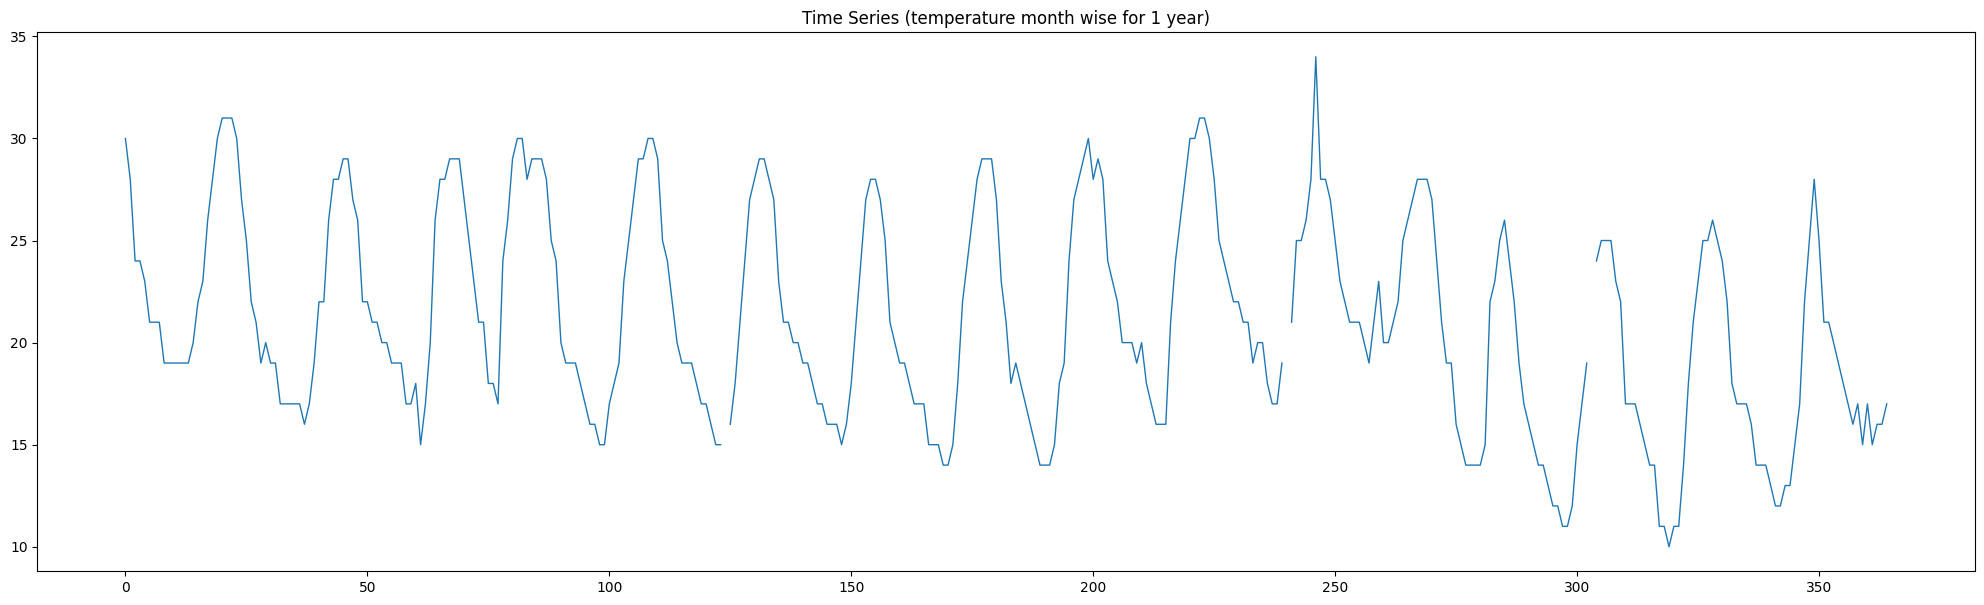

In [6]:
df=df.reshape(-1,1)
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [8]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

In [10]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [11]:
out[:10]

[array([0.875]),
 array([0.875]),
 array([0.875]),
 array([0.83333333]),
 array([0.70833333]),
 array([0.625]),
 array([0.5]),
 array([0.45833333]),
 array([0.375]),
 array([0.41666667])]

In [12]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [13]:
len(df)*0.65

237.25

In [14]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]    
y_train = out[:237]    
y_test= out[237:]

In [15]:
inp.shape
x_train.shape
x_test.shape

(108, 20, 1)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model